
# Praktikum 6 — SVM Cancer (Rapi & Siap Jalan)

Notebook ini telah **dirapikan otomatis** sesuai alur kerja yang baik untuk klasifikasi Breast Cancer dengan SVM.  
Fokus: pembersihan data, encoding target, scaling, training SVM dengan Pipeline, evaluasi, visualisasi decision boundary 2D, dan scatter 3D (serta alternatif PCA 3D).

> **Catatan:** Untuk menampilkan grafik, jalankan sel-selnya berurutan.


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay)

from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting in some environments


## 1) Load Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/praktikum_ml/praktikum06"
df = pd.read_csv(path + "/data/data.csv")
df.head()

Mounted at /content/drive


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
print(df.shape)
display(df.head(3))
df.info()
df.describe()


(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## 2) Bersih-bersih Kolom & Cek Missing/Duplikat

In [5]:

# Drop kolom yang tidak diperlukan jika ada
for col in ["id", "Unnamed: 32"]:
    if col in df.columns:
        df = df.drop(columns=col)

print("Missing per kolom (top 10):")
print(df.isna().sum().sort_values(ascending=False).head(10))

# Hapus baris duplikat (jika ada)
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"Dropped duplicates: {before - after}")


Missing per kolom (top 10):
diagnosis              0
radius_mean            0
texture_mean           0
perimeter_mean         0
area_mean              0
smoothness_mean        0
compactness_mean       0
concavity_mean         0
concave points_mean    0
symmetry_mean          0
dtype: int64
Dropped duplicates: 0


## 3) Encoding Target (diagnosis M/B → 1/0) — dilakukan sekali

In [6]:

unique_vals = df['diagnosis'].unique()
print("Unique diagnosis (sebelum encode):", unique_vals)

# Map Malignant=1, Benign=0
if df['diagnosis'].dtype == 'O':
    df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

print("Value counts diagnosis (setelah encode):")
print(df['diagnosis'].value_counts())


Unique diagnosis (sebelum encode): ['M' 'B']
Value counts diagnosis (setelah encode):
diagnosis
0    357
1    212
Name: count, dtype: int64


## 4) Pilih Fitur Numerik & Train/Test Split (stratify)

In [7]:

# Gunakan semua fitur numerik selain target
X = df.drop(columns=['diagnosis']).select_dtypes(include=[np.number])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((455, 30), (114, 30))

## 5) Training SVM dengan Pipeline (StandardScaler + SVC)

In [8]:

clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="linear", random_state=42))
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f"Akurasi: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi: 96.49%

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



## 6) Confusion Matrix

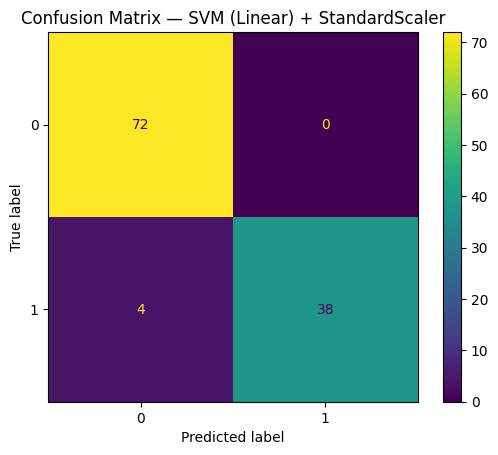

In [9]:

cm = confusion_matrix(y_test, y_pred, labels=clf.named_steps["svm"].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.named_steps["svm"].classes_)
disp.plot()
plt.title("Confusion Matrix — SVM (Linear) + StandardScaler")
plt.show()


## 7) (Opsional) GridSearchCV untuk Cari Hyperparameter Terbaik

In [11]:

param_grid = {
    "svm__kernel": ["linear", "rbf"],
    "svm__C": [0.1, 1, 10],
    "svm__gamma": ["scale", 0.01, 0.001]  # gamma dipakai ketika kernel=rbf
}

pipe = Pipeline([("scaler", StandardScaler()), ("svm", SVC(random_state=42))])
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring="accuracy")
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)
y_pred_g = grid.predict(X_test)
print("Test accuracy (best model):", accuracy_score(y_test, y_pred_g))


Best params: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best CV accuracy: 0.9736263736263737
Test accuracy (best model): 0.9736842105263158


## 8) Visualisasi Decision Boundary 2D (pilih 2 fitur)

Fitur yang dipakai untuk boundary 2D: radius_mean texture_mean


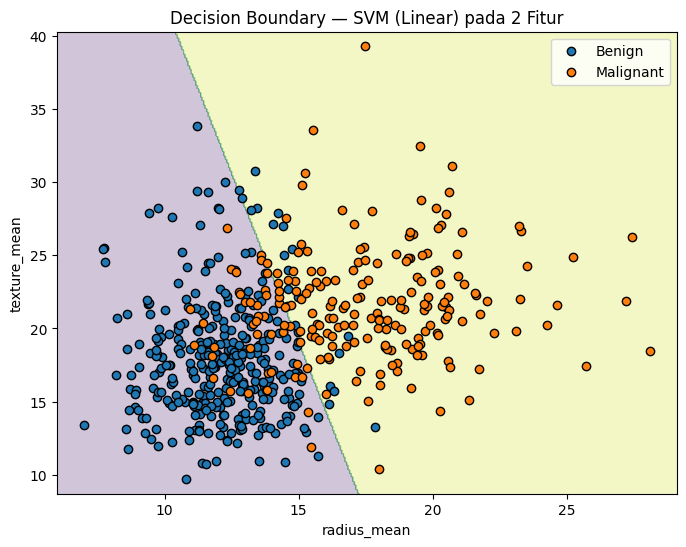

In [12]:

# Pilih 2 fitur yang umum di dataset Breast Cancer; fallback ke 2 fitur pertama jika tidak ada
preferred = ['radius_mean', 'texture_mean']
available = [f for f in preferred if f in X.columns]

if len(available) < 2:
    f1, f2 = X.columns[:2]
else:
    f1, f2 = available[:2]

print("Fitur yang dipakai untuk boundary 2D:", f1, f2)

X2 = df[[f1, f2]]
y2 = df['diagnosis']

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42, stratify=y2
)

clf2 = Pipeline([("scaler", StandardScaler()),
                 ("svm", SVC(kernel="linear", random_state=42))]).fit(X2_train, y2_train)

# Grid untuk contour
x_min, x_max = X2[f1].min()-1, X2[f1].max()+1
y_min, y_max = X2[f2].min()-1, X2[f2].max()+1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                     np.linspace(y_min, y_max, 400))
grid = pd.DataFrame({f1: xx.ravel(), f2: yy.ravel()})
Z = clf2.predict(grid).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.25)
# scatter manual agar tidak bergantung seaborn
benign = y2 == 0
malig  = y2 == 1
plt.scatter(X2.loc[benign, f1], X2.loc[benign, f2], edgecolor='k', label='Benign')
plt.scatter(X2.loc[malig,  f1], X2.loc[malig,  f2], edgecolor='k', label='Malignant')

plt.xlabel(f1); plt.ylabel(f2)
plt.title("Decision Boundary — SVM (Linear) pada 2 Fitur")
plt.legend()
plt.show()


## 9) Visualisasi 3D Scatter Tiga Fitur (bukan boundary SVM)

Fitur 3D: radius_mean perimeter_mean area_mean


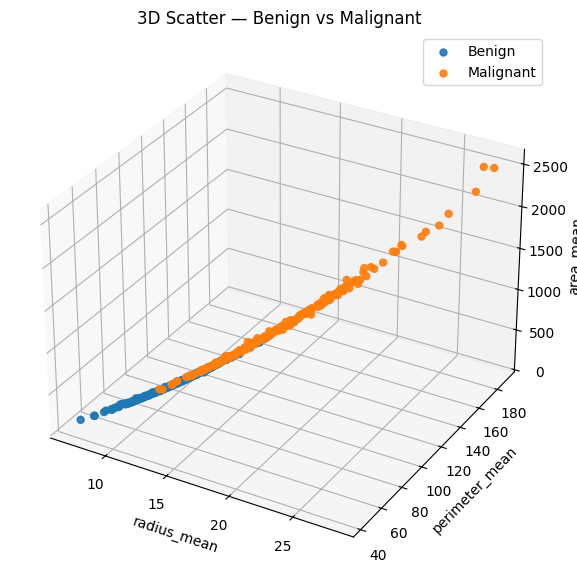

In [13]:

# Pilih 3 fitur umum; fallback ke 3 fitur pertama jika perlu
preferred3 = ['radius_mean', 'perimeter_mean', 'area_mean']
avail3 = [f for f in preferred3 if f in X.columns]

if len(avail3) < 3:
    feat1, feat2, feat3 = X.columns[:3]
else:
    feat1, feat2, feat3 = avail3[:3]

print("Fitur 3D:", feat1, feat2, feat3)

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

mask0 = df['diagnosis'] == 0
mask1 = df['diagnosis'] == 1

ax.scatter(df.loc[mask0, feat1], df.loc[mask0, feat2], df.loc[mask0, feat3], s=25, alpha=0.9, label='Benign')
ax.scatter(df.loc[mask1, feat1], df.loc[mask1, feat2], df.loc[mask1, feat3], s=25, alpha=0.9, label='Malignant')

ax.set_xlabel(feat1); ax.set_ylabel(feat2); ax.set_zlabel(feat3)
ax.set_title("3D Scatter — Benign vs Malignant")
ax.legend()
plt.show()


## 10) Alternatif: PCA ke 3 Komponen Utama (3D)

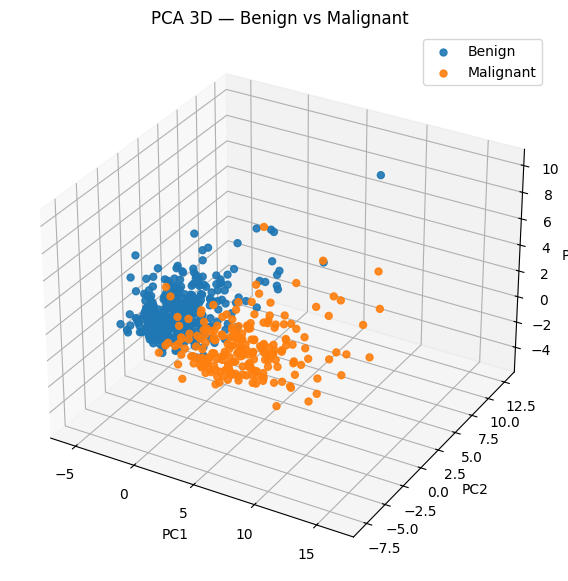

In [14]:

pipe_pca = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=3))])
X_pca = pipe_pca.fit_transform(X)

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

mask0 = y.values == 0
mask1 = y.values == 1

ax.scatter(X_pca[mask0, 0], X_pca[mask0, 1], X_pca[mask0, 2], s=25, alpha=0.9, label='Benign')
ax.scatter(X_pca[mask1, 0], X_pca[mask1, 1], X_pca[mask1, 2], s=25, alpha=0.9, label='Malignant')

ax.set_xlabel("PC1"); ax.set_ylabel("PC2"); ax.set_zlabel("PC3")
ax.set_title("PCA 3D — Benign vs Malignant")
ax.legend()
plt.show()


## 11) (Opsional) Validasi Silang Cepat

In [15]:

cv_scores = cross_val_score(
    Pipeline([("scaler", StandardScaler()), ("svm", SVC(kernel="linear", random_state=42))]),
    X, y, cv=5, scoring="accuracy", n_jobs=-1
)
print("CV accuracies:", np.round(cv_scores, 4))
print("Mean ± std:", cv_scores.mean(), "±", cv_scores.std())


CV accuracies: [0.9649 0.9825 0.9649 0.9649 0.9823]
Mean ± std: 0.9718987734823784 ± 0.008556812051479262
